In [1]:
import os
import sys
import numpy as np
import math
import copy
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
sys.path.insert(0, '..')

In [3]:
def kept_sketchs_id2(norms):
    l= len(norms)
    if l <3: return list(range(l))
    result = []
    i = 0
    while i < l:
        result.append(i)
        found = False
        j = i+1
        while j < l:
            if norms[j] > norms[i]:
                i = j -1
                found = True
                break
            if (norms[j] < (norms[i] / 2.0)):
                if j != i+1:
                    result.add(j-1)                    
                i = j - 1
                found = True
                break
            j+=1
        if not found and i != l-1: 
            result.add(l-1)
            return result
        i+=1
    return result

In [4]:
aa = [3,34,3,4,2,5]

In [6]:
aa.append(3)

In [9]:
np.log2(1000/0.05)

14.287712379549449

In [7]:
aa+[4]

[3, 34, 3, 4, 2, 5, 3, 4]

In [50]:
DATAPATH ='/home/swei20/SymNormSlidingWindows/out/randn100.csv'

In [12]:
DATADIR = '/home/swei20/SymNormSlidingWindows/out/'
FILE = 'trff_sport_1010_21:08.csv'
path = os.path.join(DATADIR, FILE)

In [142]:
from util.plot import get_pd

In [222]:
def get_path(filename,DATADIR=DATADIR):
    return os.path.join(DATADIR, filename)
def get_pd(filename, mLoop=True, normType='L2'):
    ftr = filename.split('_')[1]
    path = get_path(filename)    
    out = pd.read_csv(path)
    if mLoop:
        plot_error(out, ftr, normType)  
    else:
        plot_size_error(out, ftr, normType)
    return out
def plot_error(out, ftr, normType, cols=['errUn','errCs'], labels=['uniform','sketch']):
    for i, col in enumerate(cols): 
        plt.scatter(np.log10(out['m']), out[col], label = f'{labels[i]}')
    plt.legend(frameon=True, facecolor='lightgrey')
    plt.grid()
    plt.ylabel(f'{normType} error')
    plt.xlabel('log stream size')
    plt.title(f'CAIDA {ftr}')
def plot_size_error(out, ftr, normType):
    rList = out['r'].unique()
    colors = cm.get_cmap('viridis')(np.linspace(1,0,len(rList)))
    for i, r in enumerate(rList):
        outR = out[out['r']==r]
        plt.scatter(outR['cr'], outR['errCs'], color = colors[i] ,label=f'r={r}')
    plt.legend(frameon=True, facecolor='lightgrey')    
    plt.grid()
    plt.ylabel(f'{normType} error')
    plt.xlabel('log sketch size')
    plt.title(f'CAIDA {ftr}')

In [209]:
plt.style.use(['ieee','no-latex'])

In [147]:
filename = '/out/trff_sport__csL_1011_01:23.csv'

In [149]:
filename.split('_')[1]

'sport'

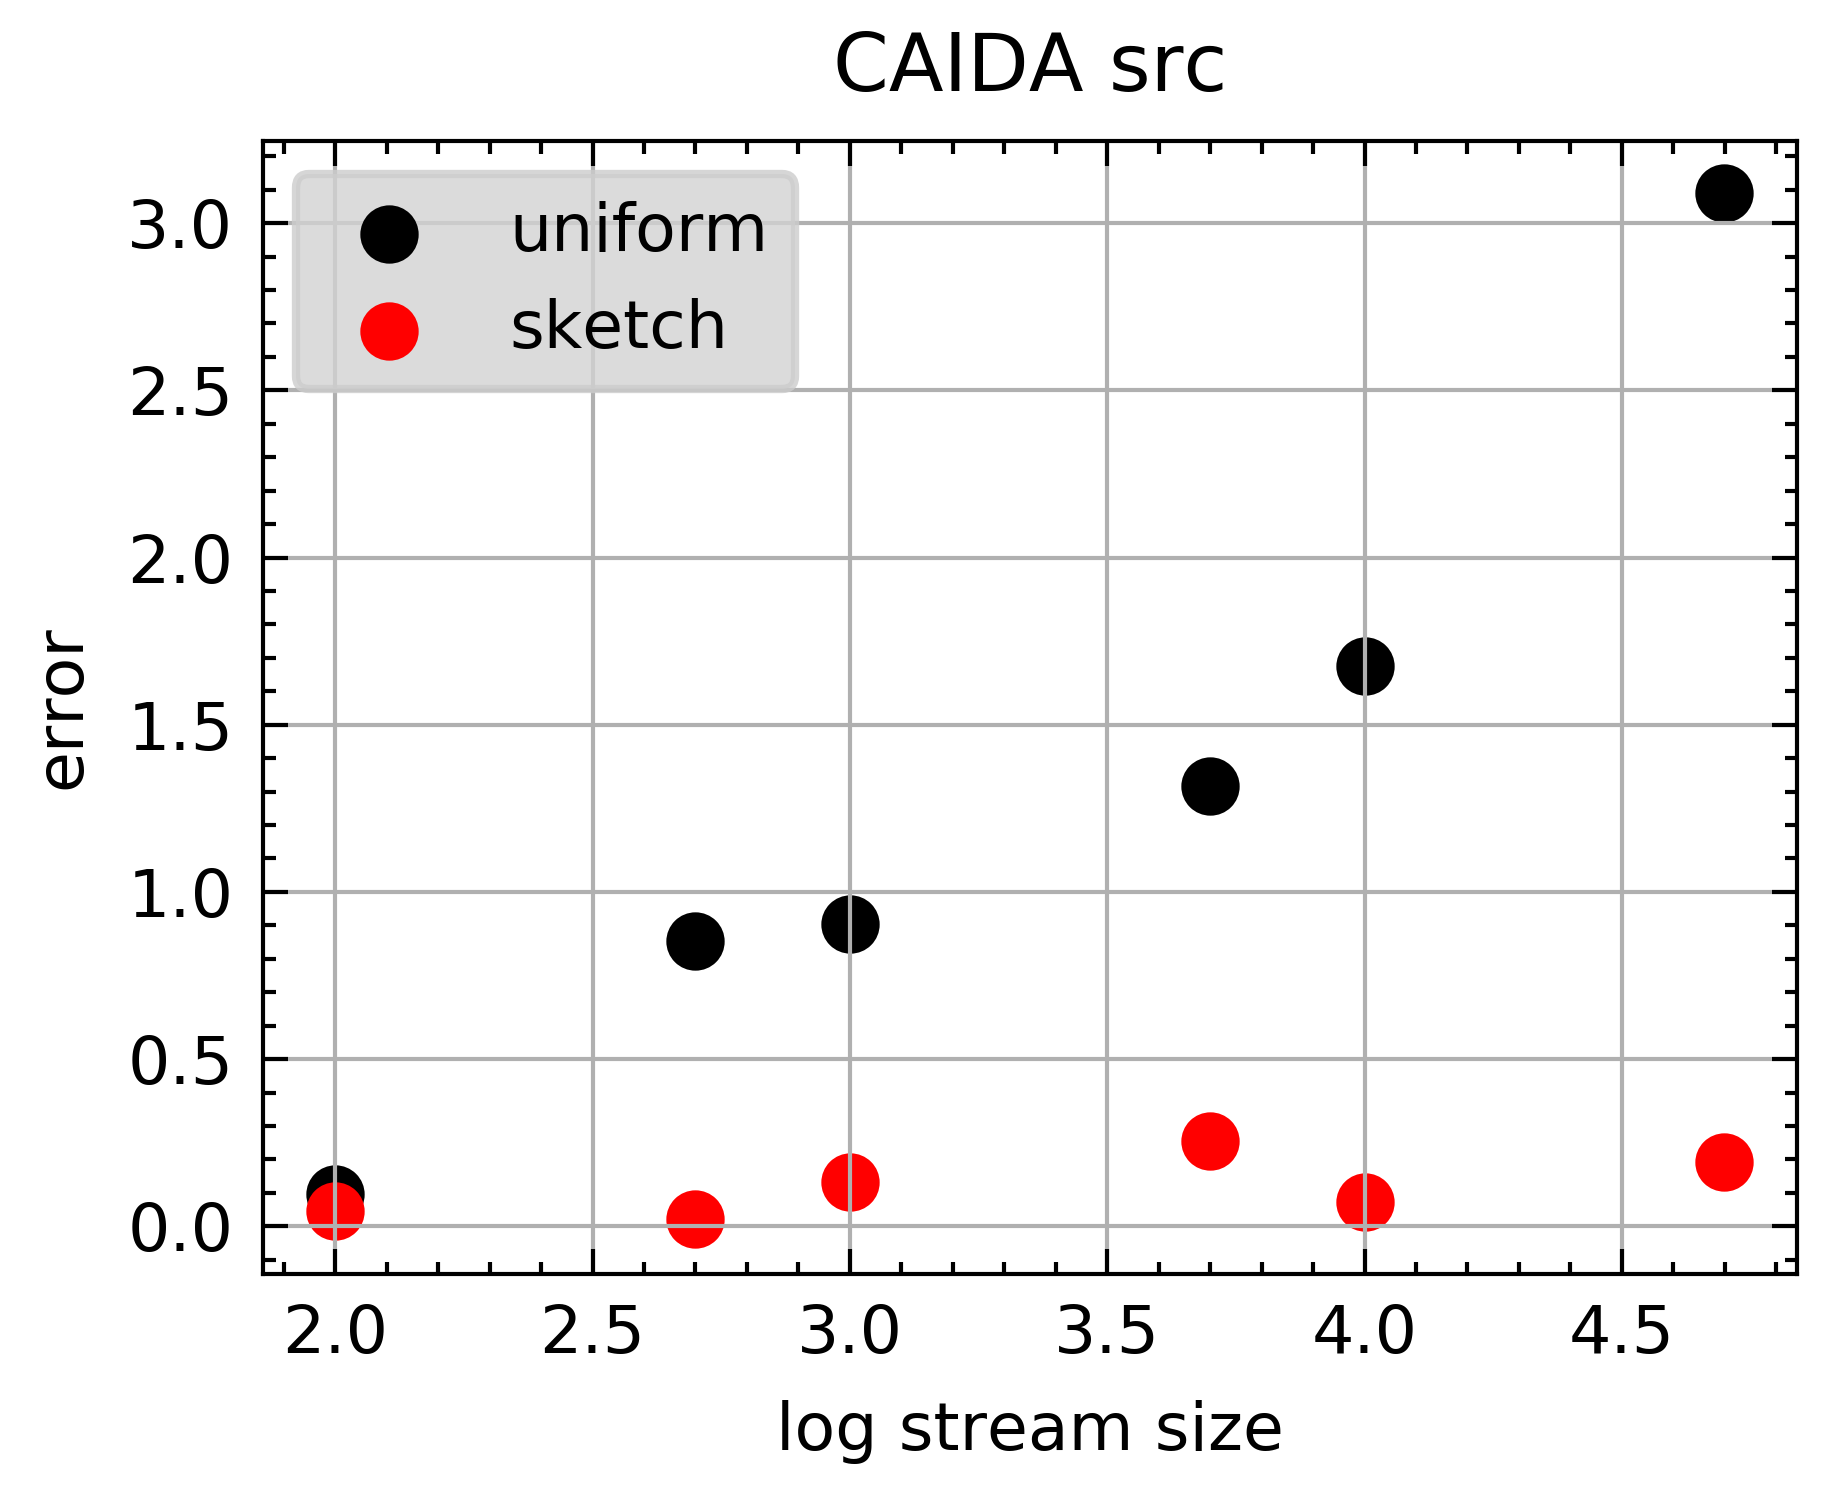

In [219]:
out2 = get_pd('trff_src__mL_c1024_1011_16:06.csv', mLoop=True)

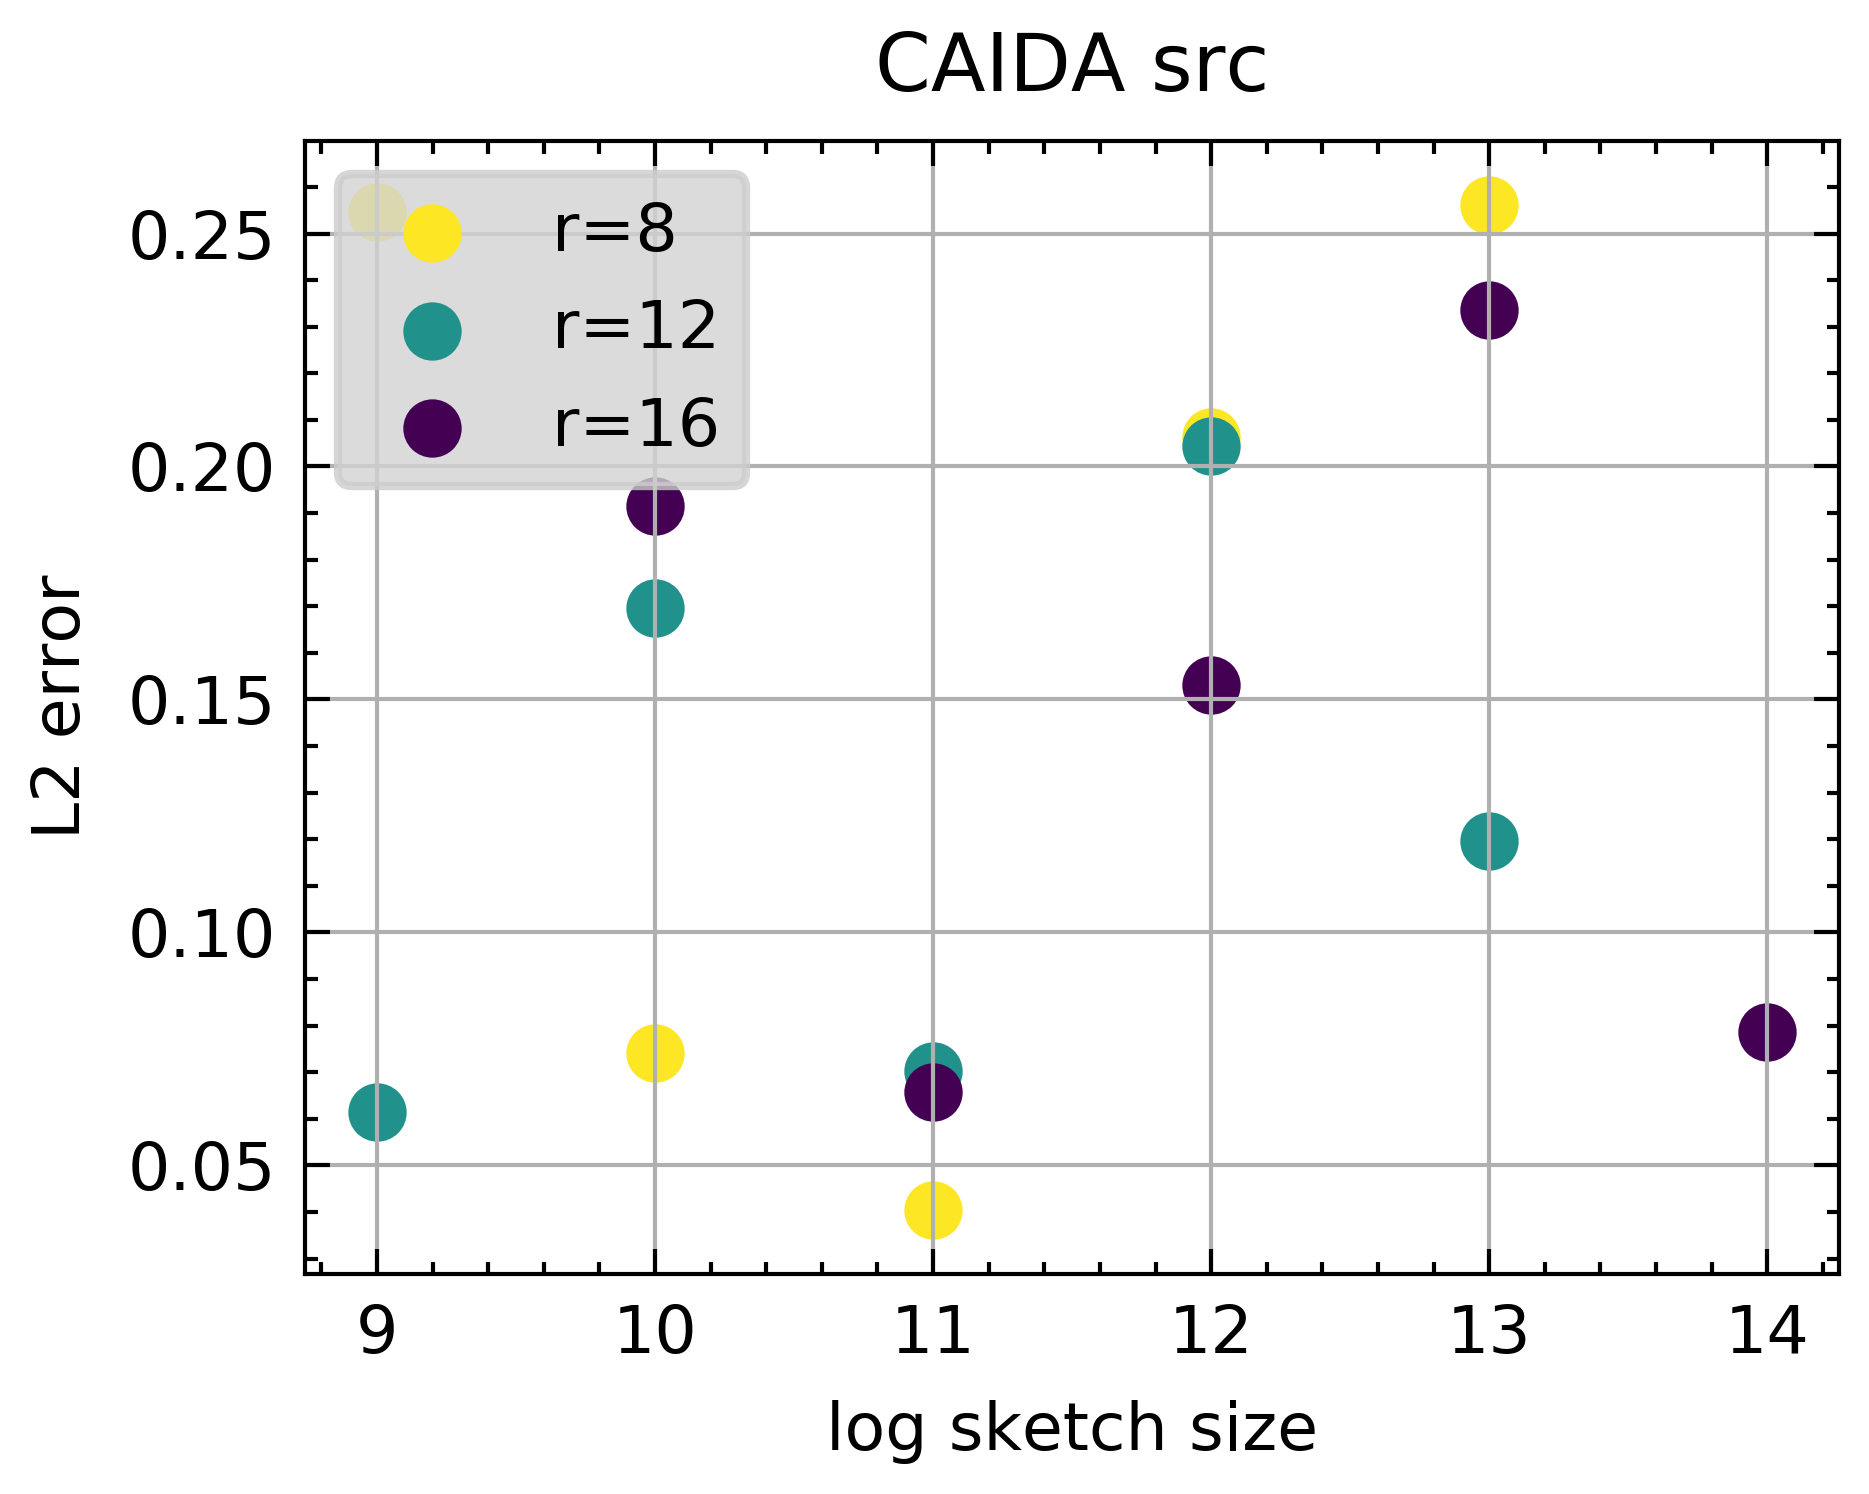

In [234]:
out3 = get_pd('trff_src__csL_m100000_1011_17:15.csv', mLoop=False)

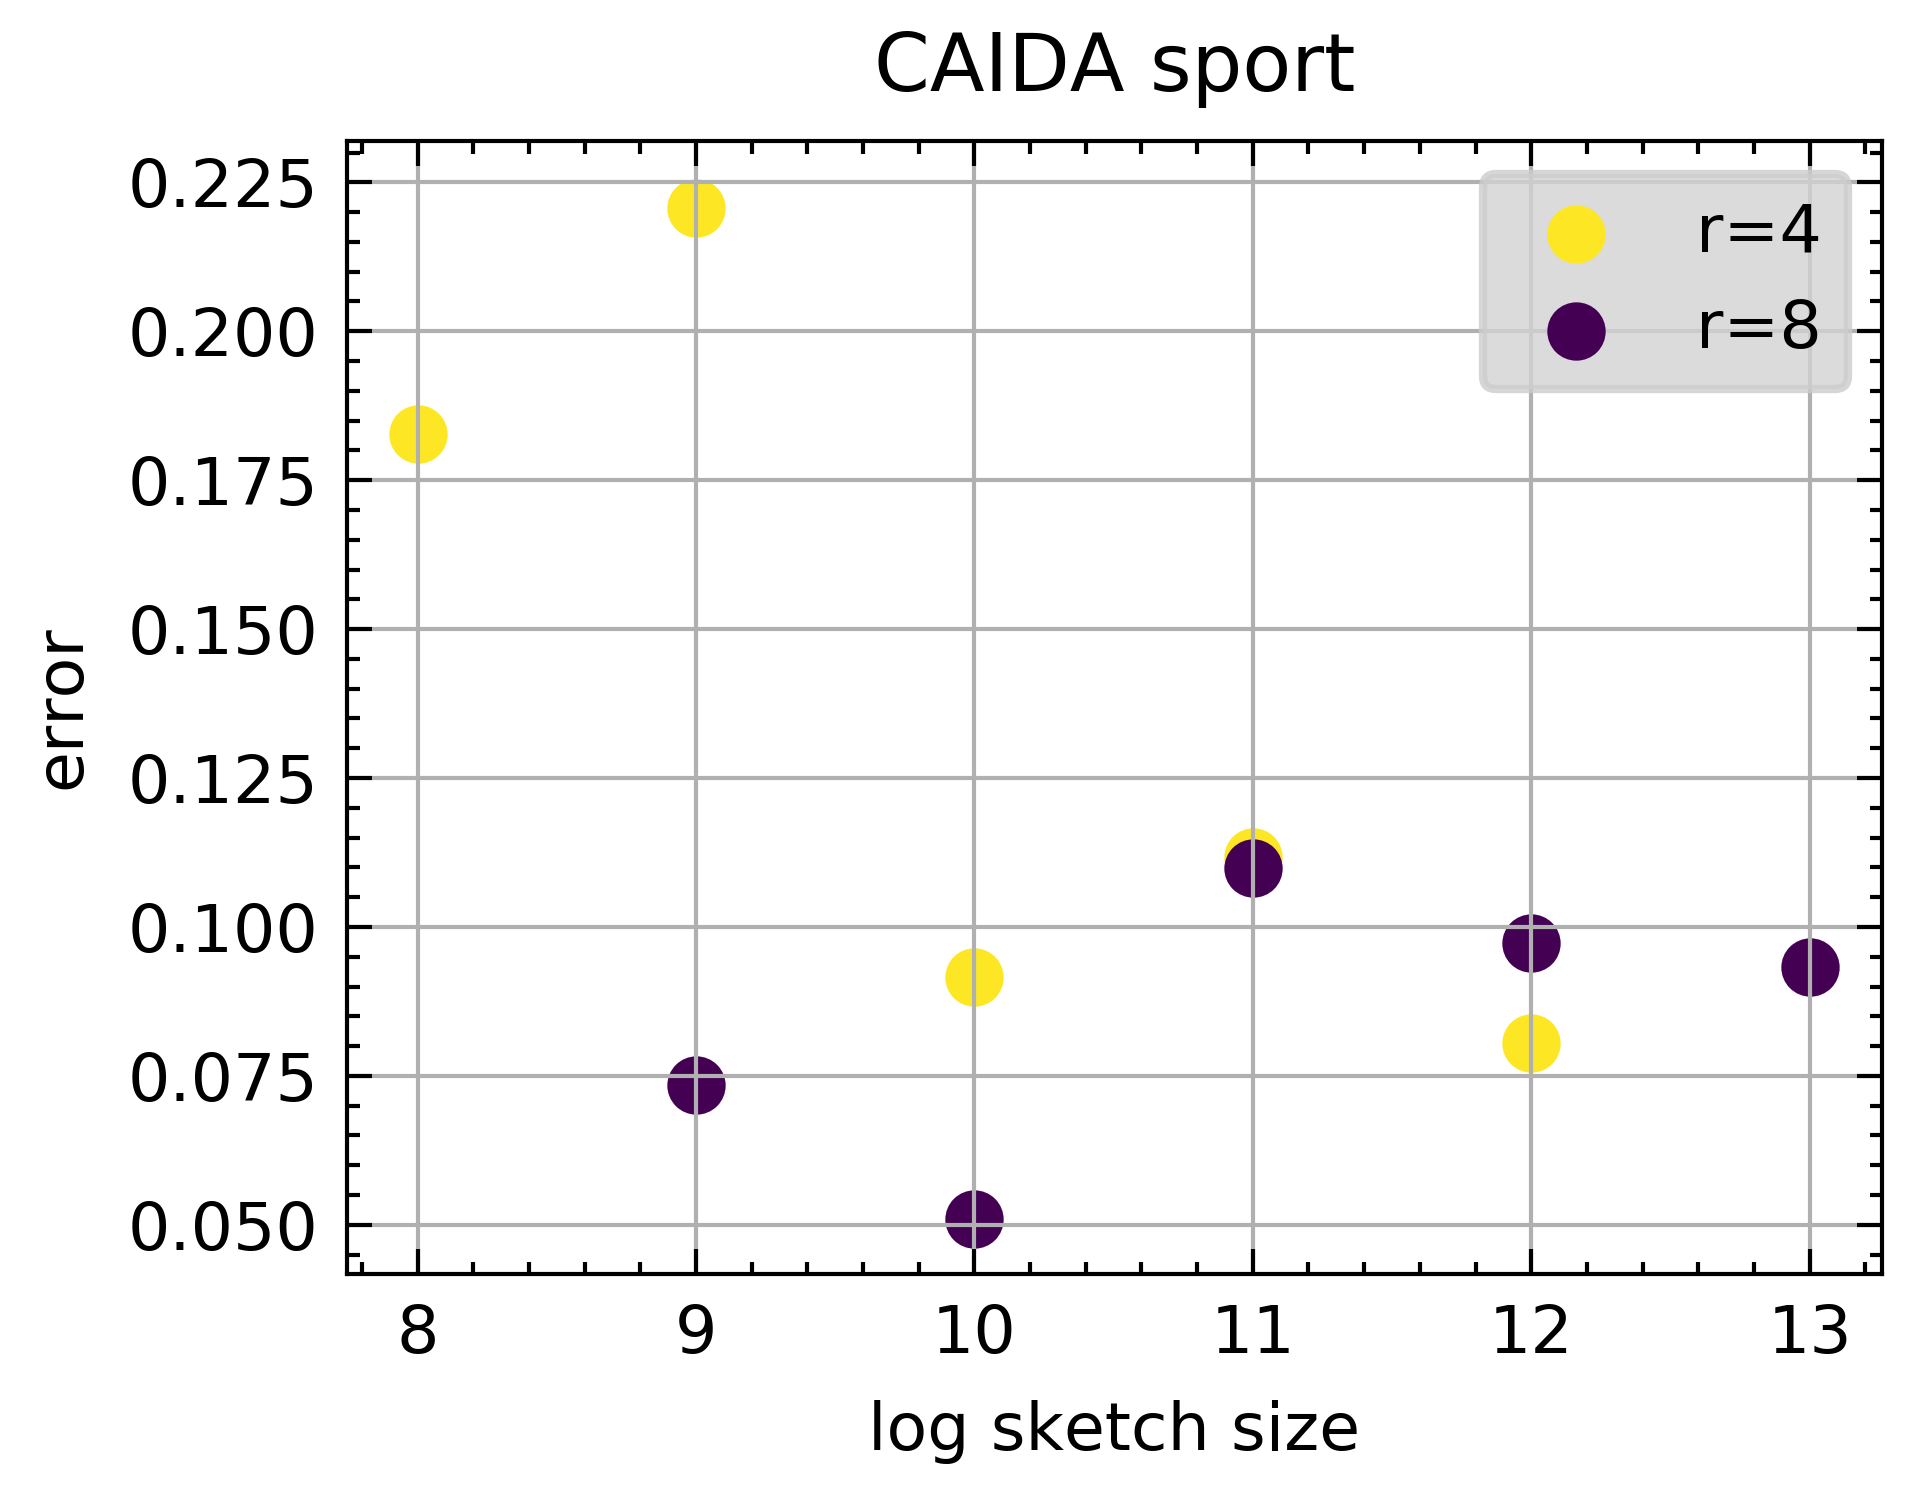

In [183]:
out3 = get_pd('trff_sport__csL_1011_01:23.csv', mLoop=False)

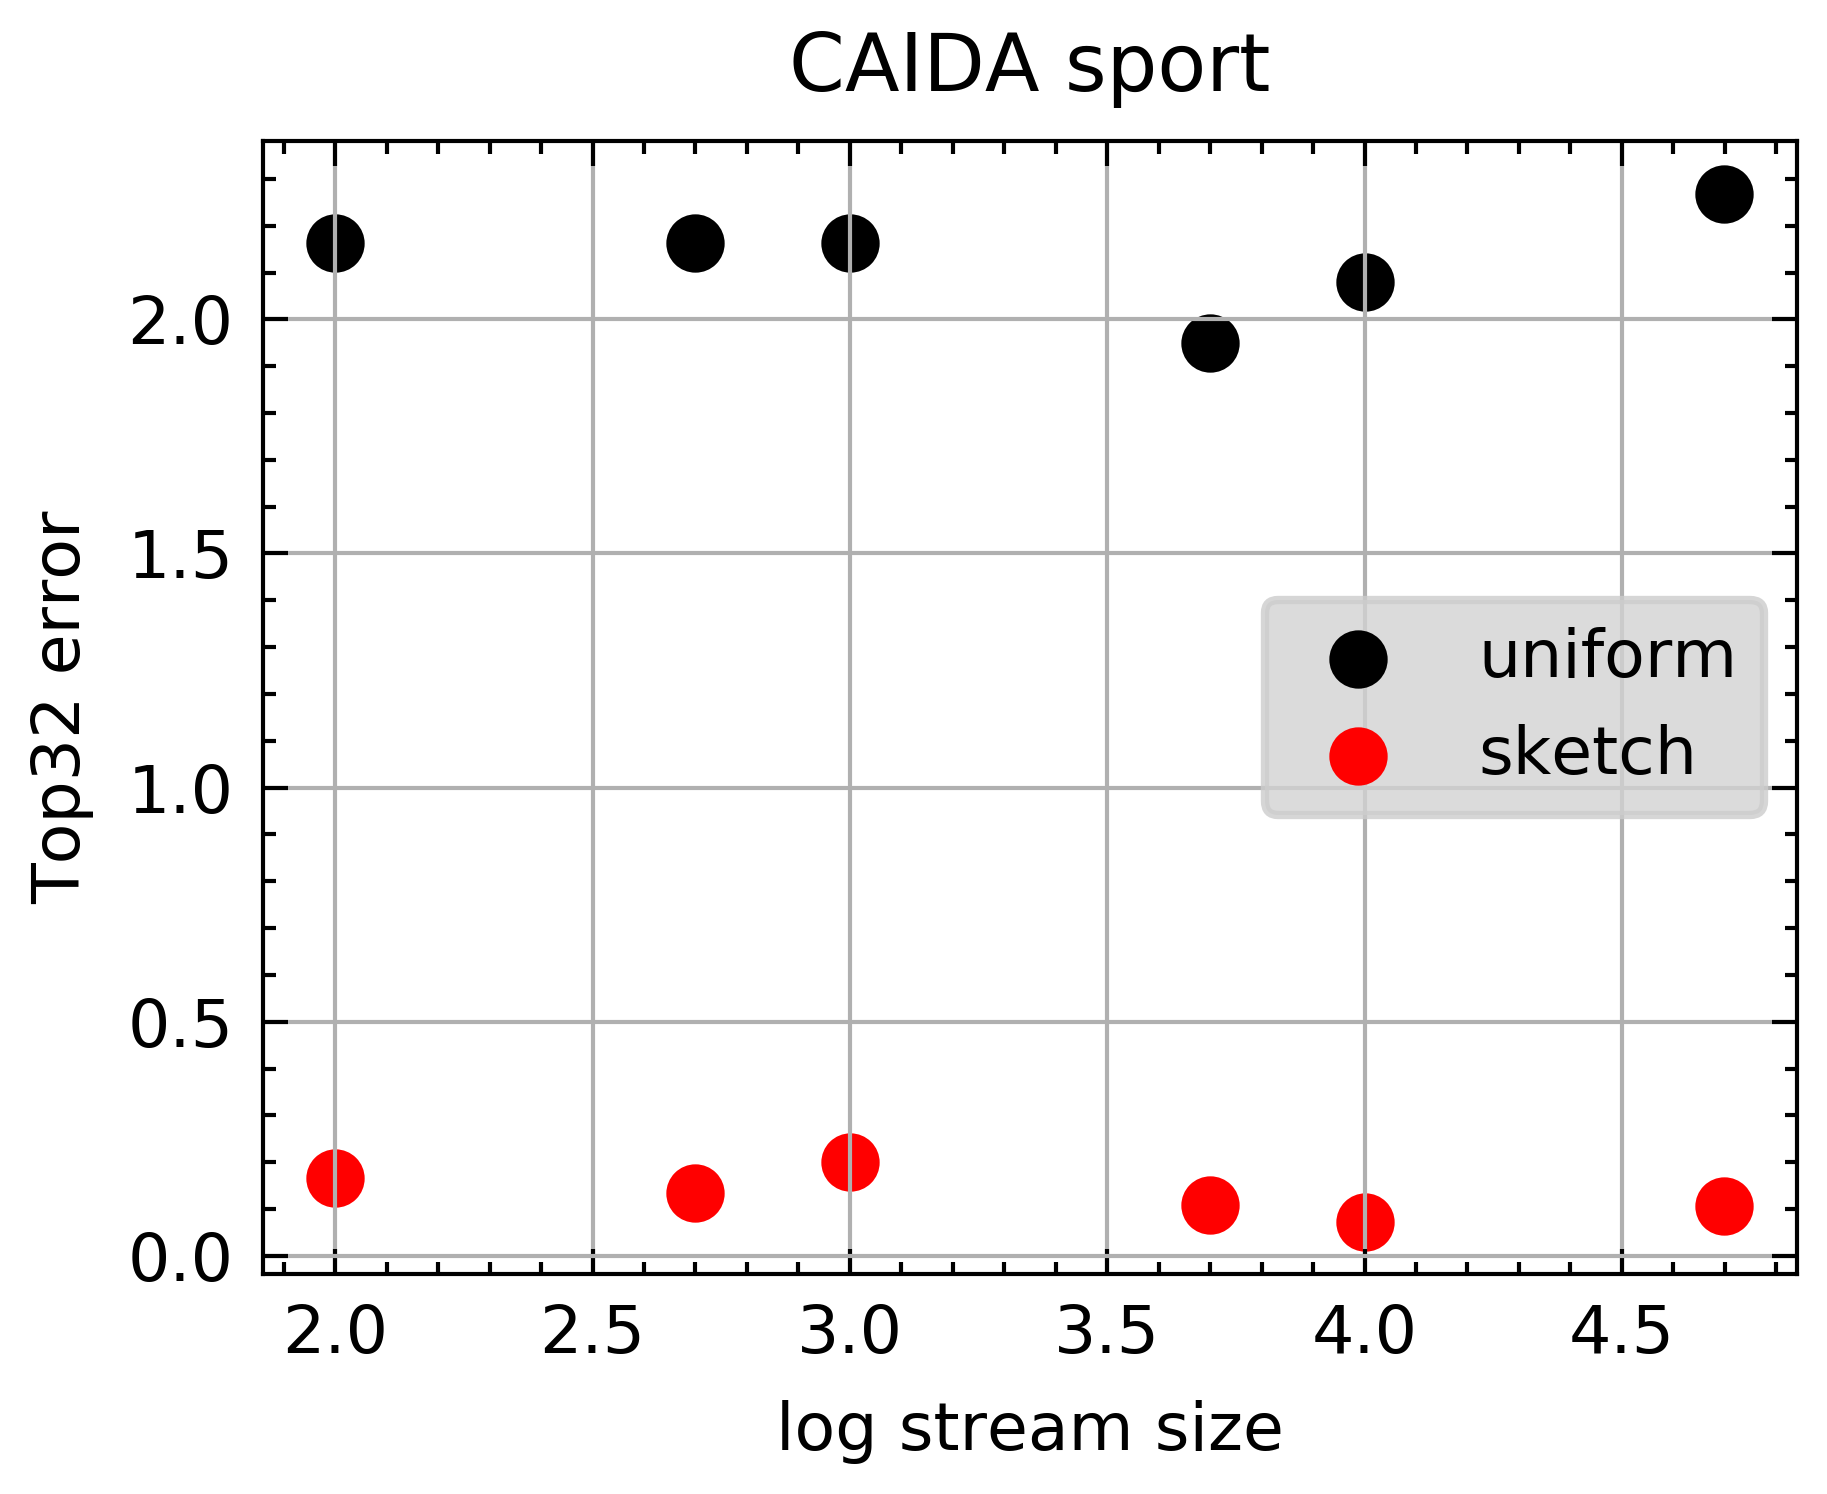

In [232]:
topK2 = get_pd('T32_sport_mL_c256_1012_02:32.csv', mLoop=True, normType='Top32')

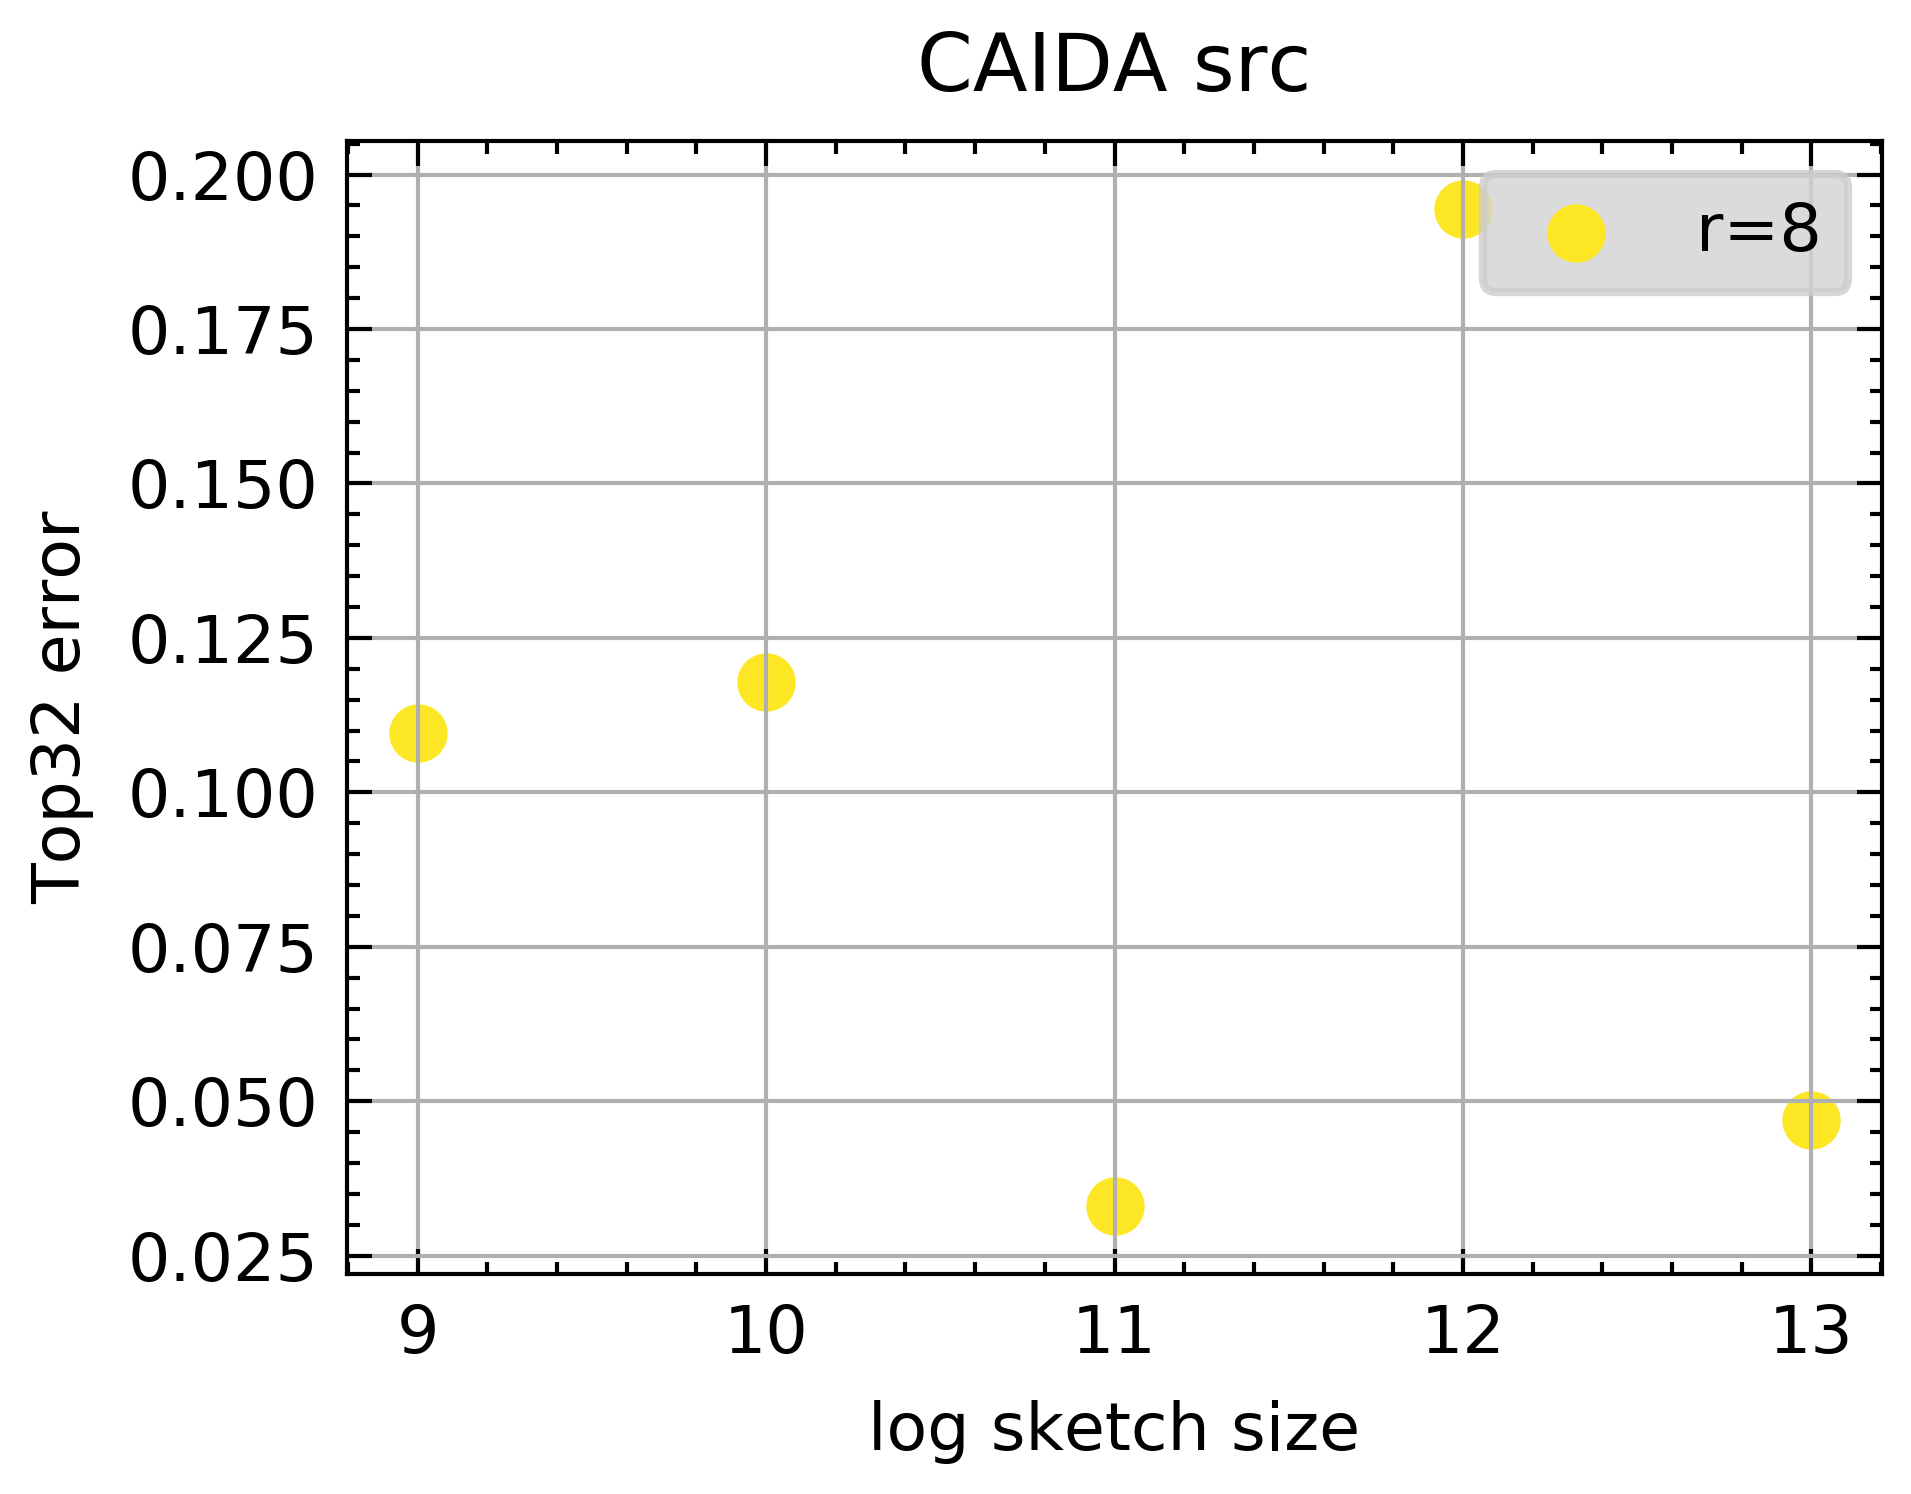

In [231]:
topK2 = get_pd('T32_src_csL_m10000_1012_02:38.csv', mLoop=False, normType='Top32')

In [ ]:
10000